In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf

## EDA

### Data Summary

In [65]:
restaurant_data = pd.read_csv("restaurant_data.csv")
restaurant_data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [66]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [67]:
restaurant_data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


### Missing Values

In [68]:
restaurant_data.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

### Correlation Matrix for Predictors

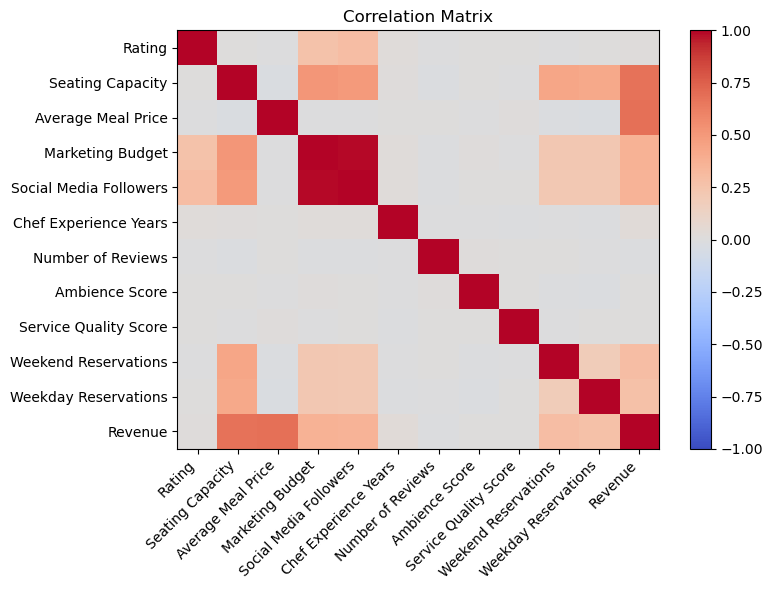

In [69]:
cols = ['Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years',
        'Number of Reviews','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']

correlation_matrix = restaurant_data[cols].corr()
response_corr = correlation_matrix['Revenue']

plt.figure(figsize=(8, 6)) 

# Create a heatmap 
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto', vmin=-1, vmax=1)

# Add a color bar 
plt.colorbar()

# Add labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.tight_layout()
plt.show()

From the correlation matrix, I think "Seating Capacity", "Average Meal Price", "Marketing Budget", and "Weekend Reservations" would be good predictors.

### Predictor Histograms

In [93]:
df = restaurant_data.rename(columns={"Seating Capacity":"seating_capacity","Average Meal Price": "average_meal_price","Marketing Budget":"marketing_budget","Weekend Reservations":"weekend_reservations"
                                     ,"Parking Availability":"parking_availability","Location":"location","Number of Reviews":"number_of_reviews","Revenue":"revenue"
                                     ,"Service Quality Score":"service_quality_score","Ambience Score":"ambience_score","Social Media Followers":"social_media_followers"})
categorical_variables = ['parking_availability','location']
numerical_variables = ['seating_capacity','average_meal_price','marketing_budget','weekend_reservations','number_of_reviews','service_quality_score','ambience_score']

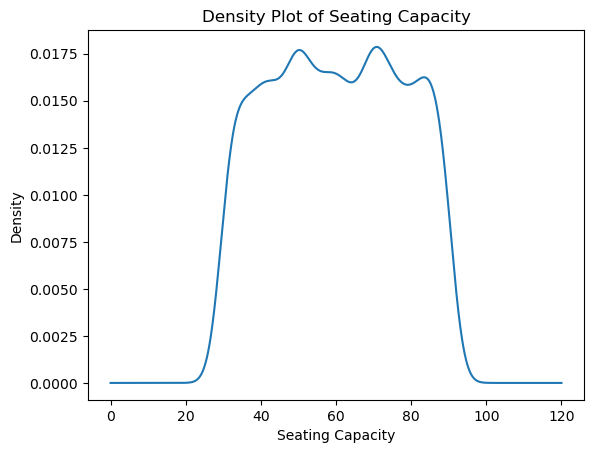

In [71]:
df['seating_capacity'].plot(kind='kde')
plt.title('Density Plot of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.show()

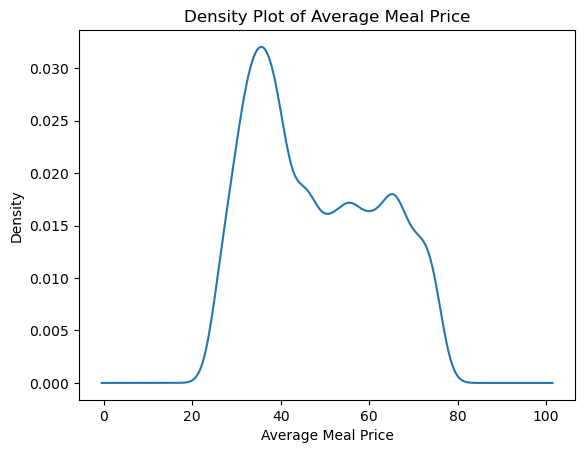

In [72]:
df['average_meal_price'].plot(kind='kde')
plt.title('Density Plot of Average Meal Price')
plt.xlabel('Average Meal Price')
plt.show()

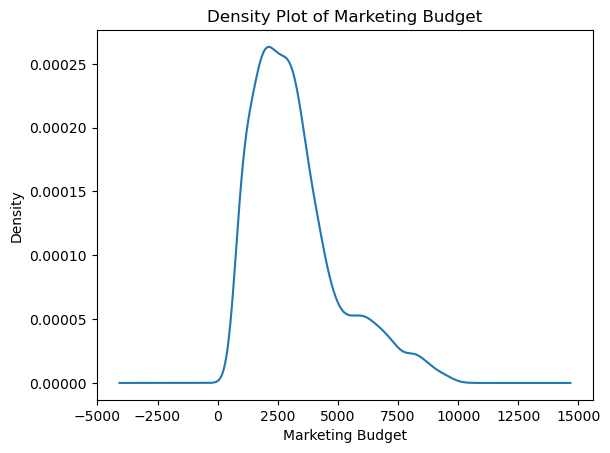

In [73]:
df['marketing_budget'].plot(kind='kde')
plt.title('Density Plot of Marketing Budget')
plt.xlabel('Marketing Budget')
plt.show()

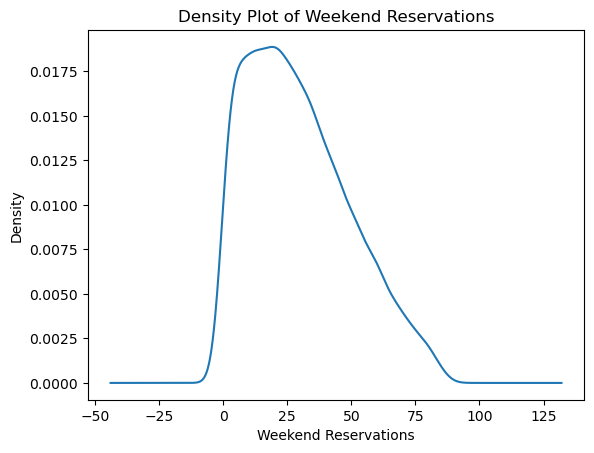

In [74]:
df['weekend_reservations'].plot(kind='kde')
plt.title('Density Plot of Weekend Reservations')
plt.xlabel('Weekend Reservations')
plt.show()

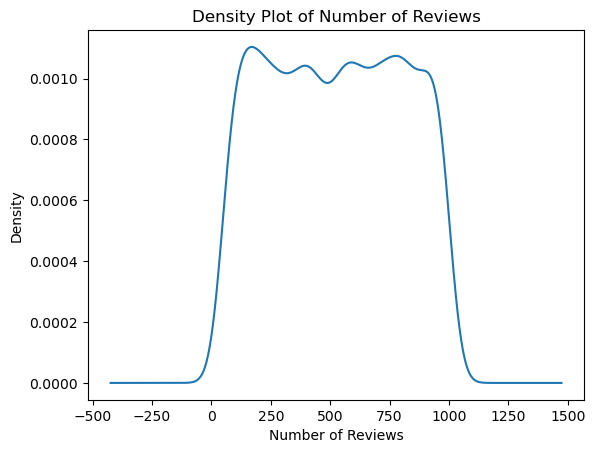

In [75]:
df['number_of_reviews'].plot(kind='kde')
plt.title('Density Plot of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

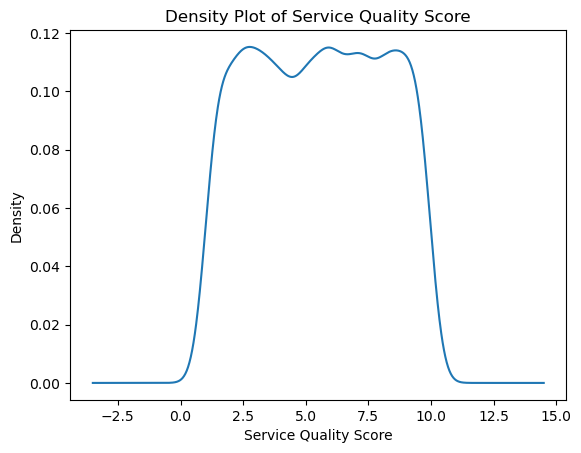

In [84]:
df['service_quality_score'].plot(kind='kde')
plt.title('Density Plot of Service Quality Score')
plt.xlabel('Service Quality Score')
plt.show()

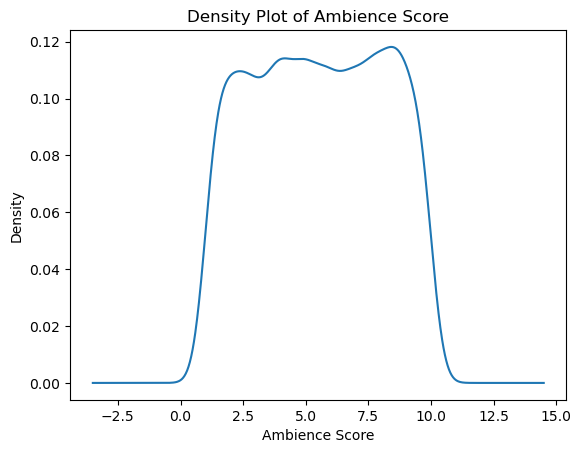

In [83]:
df['ambience_score'].plot(kind='kde')
plt.title('Density Plot of Ambience Score')
plt.xlabel('Ambience Score')
plt.show()

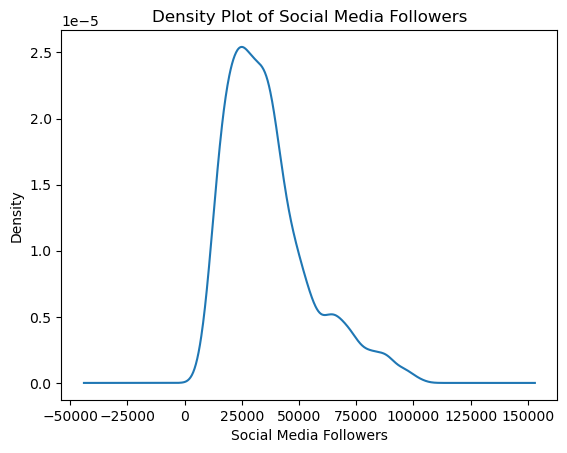

In [95]:
df['social_media_followers'].plot(kind='kde')
plt.title('Density Plot of Social Media Followers')
plt.xlabel('Social Media Followers')
plt.show()

In [96]:
from scipy.stats import normaltest

for i in numerical_variables:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')


seating_capacity: Not Gaussian  NormaltestResult(statistic=5779.46242486545, pvalue=0.0)
average_meal_price: Not Gaussian  NormaltestResult(statistic=5158.587656104718, pvalue=0.0)
marketing_budget: Not Gaussian  NormaltestResult(statistic=1336.779205700564, pvalue=5.273315073466723e-291)
weekend_reservations: Not Gaussian  NormaltestResult(statistic=503.5528439458043, pvalue=4.5174074507386953e-110)
number_of_reviews: Not Gaussian  NormaltestResult(statistic=9031.991671735324, pvalue=0.0)
service_quality_score: Not Gaussian  NormaltestResult(statistic=7596.9623205620555, pvalue=0.0)
ambience_score: Not Gaussian  NormaltestResult(statistic=6816.168716231599, pvalue=0.0)


### Frequency of Categorical Features

In [86]:
for i in categorical_variables:
    print(f'\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')


parking_availability
Yes    50.06
No     49.94
Name: count, dtype: float64

location
Downtown    33.71
Suburban    33.28
Rural       33.01
Name: count, dtype: float64


Categorical variables distributions are balanced.

## Model Fitting

### Fitting Model

In [99]:
model = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+weekend_reservations+number_of_reviews+social_media_followers+service_quality_score+ambience_score+C(parking_availability)+C(location)', data=df).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.718e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:14:39   Log-Likelihood:            -1.0321e+05
No. Observations:                8368   AIC:                         2.065e+05
Df Residuals:                    8356   BIC:                         2.065e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -6.331e+05   8912.609    -71.032      0.000   -6.51e+05   -6.16e+05
C(parking_availability)[T.Yes] -1158.7217   1204.233     -0.962      0.336   -3519.316    1201.873
C(location)[T.Rural]            4066.9177   4389.407      0.927      0.354   -4537.409    1.27e+04
C(location)[T.Suburban]         4788.1937   2687.358      1.782      0.075    -479.695    1.01e+04
seating_capacity                1.068e+04    101.586    105.106      0.000    1.05e+04    1.09e+04
average_meal_price              1.318e+04     42.035    313.472      0.000    1.31e+04    1.33e+04
marketing_budget                  -1.2342      2.127     -0.580      0.562      -5.405       2.936
weekend_reservations               0.2880     33.433      0.009      0.993     -65.250      65.826
number_of_reviews                  1.7546      2.173      0.808      0.419      -2.504       6.013
social_media_followers             0.3792      0.205      1.846      0.065      -0.024       0.782
service_quality_score            161.1953    232.787      0.692      0.489    -295.125     617.515
ambience_score                   216.9851    233.815      0.928      0.353    -241.350     675.320
==============================================================================
Omnibus:                       29.797   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.318
Skew:                           0.042   Prob(JB):                     4.78e-09
Kurtosis:                       3.320   Cond. No.                     6.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Tests

### Type 1 Anova

In [101]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(parking_availability),1.0,7.531440e+09,7.531440e+09,2.484364,1.150206e-01
C(location),2.0,2.423692e+14,1.211846e+14,39974.656490,0.000000e+00
seating_capacity,1.0,3.234576e+13,3.234576e+13,10669.760690,0.000000e+00
average_meal_price,1.0,2.981381e+14,2.981381e+14,98345.578282,0.000000e+00
marketing_budget,1.0,1.165048e+11,1.165048e+11,38.430945,5.941523e-10
weekend_reservations,1.0,7.932573e+05,7.932573e+05,0.000262,9.870942e-01
number_of_reviews,1.0,2.028125e+09,2.028125e+09,0.669009,4.134207e-01
social_media_followers,1.0,1.032676e+10,1.032676e+10,3.406444,6.497762e-02
service_quality_score,1.0,1.455694e+09,1.455694e+09,0.480184,4.883584e-01
ambience_score,1.0,2.610827e+09,2.610827e+09,0.861223,3.534236e-01


Weekend reservations is not significant when added to a model with the other predictors.

### Type 2 Anova

In [102]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(parking_availability),2.806727e+09,1.0,0.925843,0.335973
C(location),1.394819e+10,2.0,2.300515,0.100271
seating_capacity,3.348989e+13,1.0,11047.169224,0.000000
average_meal_price,2.978936e+14,1.0,98264.904427,0.000000
marketing_budget,1.020345e+09,1.0,0.336577,0.561827
weekend_reservations,2.249463e+05,1.0,0.000074,0.993127
number_of_reviews,1.977274e+09,1.0,0.652235,0.419338
social_media_followers,1.032668e+10,1.0,3.406419,0.064979
service_quality_score,1.453618e+09,1.0,0.479499,0.488669
ambience_score,2.610827e+09,1.0,0.861223,0.353424


Adding Weekend Reservations, Parking Availability, Location, and Number of Reviews doesn't significantly improve the model.

### Multicollinearity

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices #an alternative to basic pandas dfs.

y, X = dmatrices('revenue~seating_capacity+average_meal_price+marketing_budget+social_media_followers', 
                  data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor                features
0   27.087164               Intercept
1    1.355131        seating_capacity
2    1.001681      average_meal_price
3   41.099584        marketing_budget
4   40.400360  social_media_followers


Social media followers and marketing budget have severe multicollinearity.

### R^2

In [109]:
model1 = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+number_of_reviews', data=df).fit()
model2 = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+number_of_reviews+C(parking_availability)+C(location)', data=df).fit()

In [110]:
print(model1.rsquared, model1.rsquared_adj)
print(model2.rsquared, model2.rsquared_adj)

0.9576099558295997 0.9575896807875477
0.9576385664597895 0.9576030963599352


Barely any difference when adding other predictors.

### Heteroskedasticity and Transformations

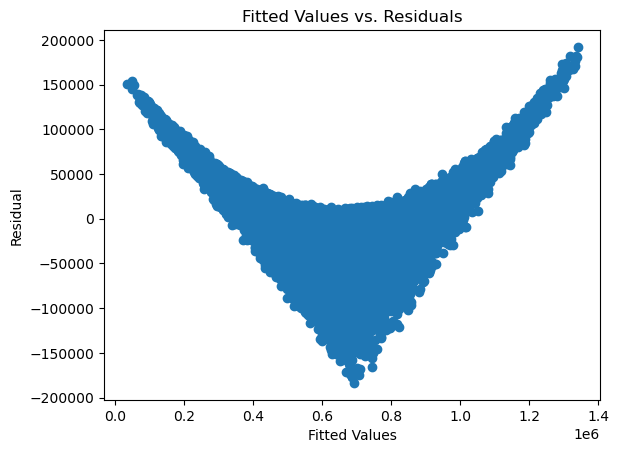

In [115]:
p = model1.fittedvalues
res = model1.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()

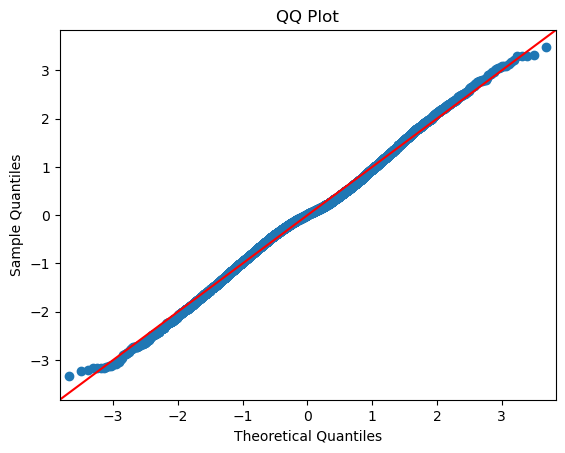

In [114]:
sm.qqplot(res, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

We see heteroskedasticity.

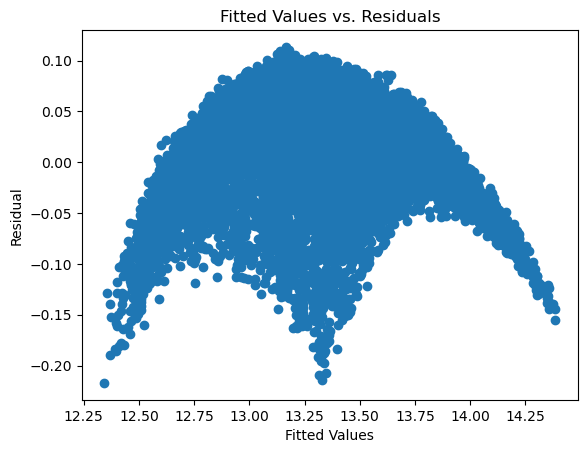

In [118]:
model_log = smf.ols('np.log(revenue) ~ seating_capacity + average_meal_price + marketing_budget + number_of_reviews', data=df).fit()

p = model_log.fittedvalues
res = model_log.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()

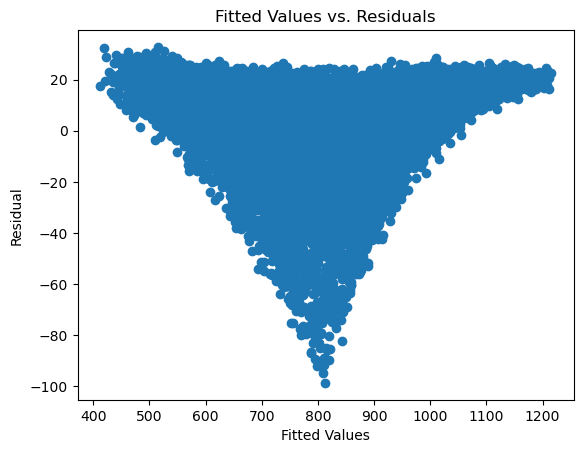

In [119]:
model_sqrt = smf.ols('np.sqrt(revenue) ~ seating_capacity + average_meal_price + marketing_budget + number_of_reviews', data=df).fit()

p = model_sqrt.fittedvalues
res = model_sqrt.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.show()